# Exercise Sheet 3

## Exercise 1:
Consider linear least squares regression with a $\|w\|_2^2$ regularizer, i.e., we have the following regularized risk minimization problem:
$$
\min_{w} \frac{1}{2n} \|Xw - y\|_2^2 + \frac{\lambda}{2} \|w\|_2^2
$$
This problem can be solved similarly to the linear least squares problem without the regularization term (of course, not exactly the same). The goal of this exercise is to come up with a way of solving it. For this, compute the gradient and set it to zero, similarly as we did in class for the case without the regularization term. What system of linear equations need to be solved?

#### Solution:
![Example Image](./exercise_1_solution.jpg "Example Title")

## Exercise 2:
Implement a solver for the problem from Exercise 1. For this, extend the least squares regression
solver from the first exercise sheet.
If you had trouble solving Exercise 1, you can for this time also make use of the corresponding
solver from scikit-learn.
Please note: The rest of scikit-learn is still not allowed on this exercise sheet. Please implement
the corresponding methods yourself.

#### Solution:

In [1]:
import numpy as np

def regression(x, y, lambda_val: float = 0.01):
    x = np.asarray(x)
    y = np.asarray(y)
    # assemble matrix A
    # Add vector for bias
    X = np.vstack([x.T, np.ones(x.shape[0])]).T

    # turn y into a column vector
    y = y[:, np.newaxis]

    # calculate weights:
    # w = (XᵀX)⁻¹Xᵀy
    # Compute X^TX and X^Ty
    XTX = np.dot(X.T, X)
    XTy = np.dot(X.T, y)

    # Define regularization parameter lambda and identity matrix I
    n = X.shape[0]  # Number of samples
    I = np.identity(XTX.shape[0])  # Identity matrix of appropriate size

    # Add regularization term lambda*n*I to XTX
    XTX_reg = XTX + lambda_val * n * I

    # Solve the linear equations for w
    w = np.linalg.solve(XTX_reg, XTy)
    return w


In [57]:
import matplotlib.pyplot as plt
def plot(x, y, w=None, sigma=None):
    '''
    only for plotting 2D data
    '''

    plt.plot(x, y, '.r', markersize=8, label='Samples')

    # also plot the prediction
    if not w is None:
        deg = w.shape[0]
        x_plot = np.linspace(np.min(x), np.max(x), 100)
        X_plot = np.vander(x_plot, deg)

        # set plotting range properly
        # plt.ylim((np.min(y) * 1.2, np.max(y) * 1.2))

        plt.plot(x_plot, np.dot(X_plot, w), linewidth=5, color='tab:blue', label="Model")

        # also plot confidence intervall
        if not sigma is None:
            plt.plot(x_plot, np.dot(X_plot, w) + sigma, linewidth=2, color='tab:cyan')
            plt.plot(x_plot, np.dot(X_plot, w) - sigma, linewidth=2, color='tab:cyan')

    plt.tight_layout()
    plt.savefig('fig.pdf')

    plt.show()

In [49]:
# load in the data
def load_data(name, m = None, rng = None):
    data = np.load(name)
    x = data[:,:-1]
    y = data[:,-1]

    if not m is None:
        if rng is None: rng = np.default_rng(seed = 66)
        idx = rng.choice(m, size = len(x), replace = False)
        x = x[idx]
        y = y[idx]

    return (x, y)

x_train, y_train = load_data("dataset_poly_train.npy")
x_test, y_test = load_data("dataset_poly_test.npy")

## Exercise 3:
Extend your solver to also solve polynomial regression.

In [30]:
def generate_polynomial_features(X, degree: int = 6):
    """
    Generate polynomial features up to the specified degree.

    Parameters:
        X (ndarray): Input features, shape (n_samples, n_features).
        degree (int): Degree of the polynomial features.

    Returns:
        ndarray: Design matrix with polynomial features, shape (n_samples, n_features_new).
    """
    n_samples, n_features = X.shape
    X_poly = np.ones((n_samples, 1))  # Initialize with bias term

    for d in range(1, degree + 1):
        X_poly = np.concatenate((X_poly, X**d), axis=1)

    return X_poly

def regression(x, y, lambda_val: float = 0.01, degree: int = None):
    if degree:
        x = generate_polynomial_features(x, degree)
    # assemble matrix A
    # Add vector for bias
    X = np.vstack([x.T, np.ones(x.shape[0])]).T

    # turn y into a column vector
    y = y[:, np.newaxis]

    # calculate weights:
    # w = (XᵀX)⁻¹Xᵀy
    # Compute X^TX and X^Ty
    XTX = np.dot(X.T, X)
    XTy = np.dot(X.T, y)

    # Define regularization parameter lambda and identity matrix I
    n = X.shape[0]  # Number of samples
    I = np.identity(XTX.shape[0])  # Identity matrix of appropriate size

    # Add regularization term lambda*n*I to XTX
    XTX_reg = XTX + lambda_val * n * I

    # Solve the linear equations for w
    w = np.linalg.solve(XTX_reg, XTy)
    return w


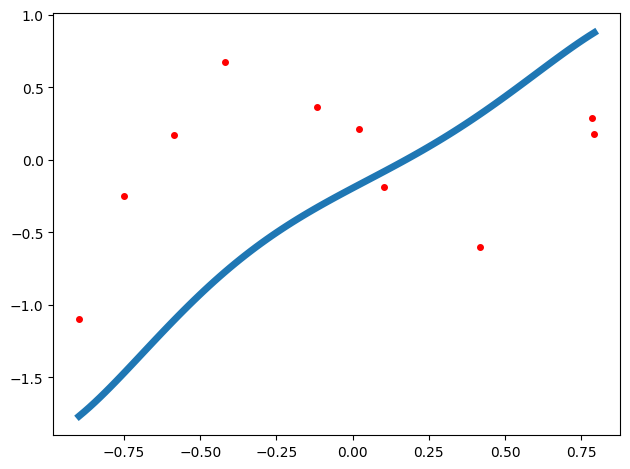

In [81]:
degree = 6
def polynomial_regression(X, y, degree, lmbda):
    # Polynomial features
    # X = np.vstack([X.T, np.ones(X.shape[0])]).T
    X_poly = np.column_stack([X ** i for i in range(degree + 1)])

    # Regularized least squares solution
    I = np.eye(X_poly.shape[1])
    w = np.linalg.inv(X_poly.T.dot(X_poly) + lmbda * I).dot(X_poly.T.dot(y))

    return w
w = polynomial_regression(x_train, y_train, degree, 0.1)
plot(x_train, y_train, w)

array([ -1.73000011,   5.25456272,   0.54561534,  -0.54041064,
        -3.77969937,   2.69537262,  -3.86215362,   6.62271974,
         7.37778865,  -2.94426713,   4.32369562,  -1.60273379,
         0.33270899,   7.94026464,  -9.51276161,  -8.95494211,
       -11.22995414,   5.28965574,   3.89067457,   6.0406898 ,
         7.75922056,   3.25688868,  -1.59298661,   4.20880259,
       -10.26470983,   2.26120268,  -9.04023262,   7.94532374,
         0.166057  ,  -2.57777829,  -4.56948707,   3.24984797,
        -1.47465171,  -0.31613111, -11.49500114,   0.77386028,
         0.93036192,   1.39484528,   6.70981173,   3.53723247,
        -3.34417955,  -3.79560461,   4.44087611,  -7.89960139,
         3.51411388,   2.23283256,  -7.8631014 ,  -7.36702232,
        -5.09460993,  -2.50333951])

## Exercise 4:
Implement k-fold cross validation and use this with polynomial regression (use a polynomial of
degree 6) on the provided data set. The provided data set consists of a training set and a test set
(dataset_poly_train.npy and dataset_poly_test.npy).

In [42]:
def k_fold_cross_validation(x, y, k: int = 3):
    # 1. split training data into k blocks
    k = min(x_train.shape[0], k)
    x_blocks = np.array_split(x, k)
    y_blocks = np.array_split(y, k)

    for i in range(k):
        x_val_k = x_blocks[i]
        x_train_k = np.concatenate(x_blocks[:i] + x_blocks[i + 1:])
        y_val_k = y_blocks[i]
        y_train_k = np.concatenate(y_blocks[:i] + y_blocks[i + 1:])
        w = regression(x_train_k, y_train_k)
        w_val = regression(y_val_k, y_val_k)


## Exercise 5:
Extend your solution to also compute the regularization path and plot the training error and the
validation error. Vary the regularization parameter λ for the regularization path in the interval
$[10^{−9},10^3]$. Use the empirical error $\frac{1}{2 n}\|X w-y\|_2^2$ for n data points. Note, the error is scaled by the
number of data points for which the error is computed such that the error is comparable for data
sets of different size, like the training and the validation set.

In [89]:

def compute_error(X, y, w):
    n = len(X)
    y_pred = np.dot(X, w)
    error = 0.5 / n * np.linalg.norm(y - y_pred) ** 2
    return error

def k_fold_cross_validation(x, y, k: int = 3):
    # 1. split training data into k blocks
    k = min(x.shape[0], k)
    x_blocks = np.array_split(x, k)
    y_blocks = np.array_split(y, k)
    train_errors = []
    val_errors = []
    lambdas = np.linspace(10**-9, 10**3, k)
    for i in range(k):
        x_val_k = x_blocks[i]
        x_train_k = np.concatenate(x_blocks[:i] + x_blocks[i + 1:])
        y_val_k = y_blocks[i]
        y_train_k = np.concatenate(y_blocks[:i] + y_blocks[i + 1:])
        # Compute coefficients for training data
        w = polynomial_regression(x_train_k, y_train_k, degree, lambdas[i])

        # Compute training error
        train_error = compute_error(np.column_stack([x_train_k ** i for i in range(degree + 1)]), y_train_k, w)
        train_errors.append(train_error)

        # Compute validation error
        val_error = compute_error(np.column_stack([x_val_k ** i for i in range(degree + 1)]), y_val_k, w)
        val_errors.append(val_error)

    # Plot regularization path
    plt.figure(figsize=(10, 6))
    plt.semilogx(lambdas, train_errors, label='Training Error', marker='o')
    plt.semilogx(lambdas, val_errors, label='Validation Error', marker='o')
    val_error_min = np.argmin(val_errors)
    min_l = lambdas[val_error_min]
    plt.annotate(f"Val Min: {round(val_errors[val_error_min], 2)} at {min_l}", (min_l,val_errors[val_error_min]))
    train_error_min = np.argmin(train_errors)
    min_l = lambdas[train_error_min]
    plt.annotate(f"Train Min: {round(train_errors[train_error_min], 2)} at {min_l}", (min_l,train_errors[train_error_min]))
    plt.xlabel('Regularization Parameter (λ)')
    plt.ylabel('Error')
    plt.title('Regularization Path')
    plt.legend()
    plt.grid(True)
    plt.show()


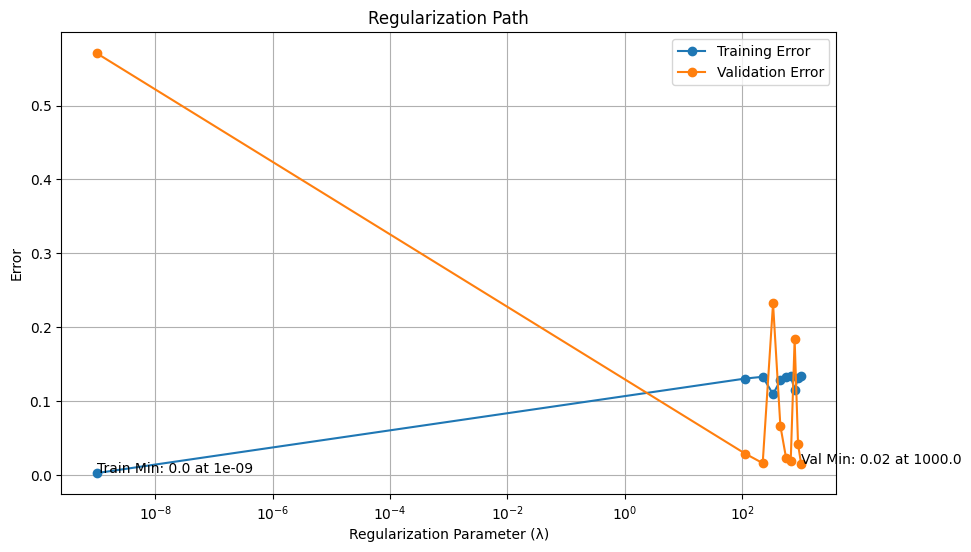

In [90]:
k_fold_cross_validation(x_train, y_train, k = 10)

#### Exercise 6:
Pick the best λ∗ from the regularization path and compute the corresponding best classifier w∗ for
the whole training set. Report training and test error.

In [94]:
w = polynomial_regression(x_train, y_train, degree, 1000)
train_error = compute_error(np.column_stack([x_train ** i for i in range(degree + 1)]), y_train, w)
w = polynomial_regression(x_test, y_test, degree, 1000)
test_error = compute_error(np.column_stack([x_test ** i for i in range(degree + 1)]), y_test, w)
print(f"{train_error = }, {test_error = }")

train_error = 0.12233825516610351, test_error = 0.09677958053641929
